1. 데이터의 요약값을 보고 NA값이 10,000개 이상인 열을 제외하고 남은 변수 중 NA값이 있는 행을 제거하시오. 그리고 AUS 데이터의 Date 변수를 Date형으로 변환하고, 전처리가 완료된 weather AUS 데이터를 train(70%), test(30%) 데이터로 분할하시오. (set.seed(6789)를 실행한 후 데이터를 분할하시오.)

In [1]:
import pandas as pd
df = pd.read_csv('../data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [4]:
# 결측치가 10000개 이상인 열 삭제
df.drop(columns=['WindDir9am','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'], axis=1, inplace=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No


In [6]:
df.dropna(inplace=True)
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [7]:
# Date 변수를 Date형으로 변환
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128576 entries, 0 to 142192
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           128576 non-null  datetime64[ns]
 1   Location       128576 non-null  object        
 2   MinTemp        128576 non-null  float64       
 3   MaxTemp        128576 non-null  float64       
 4   Rainfall       128576 non-null  float64       
 5   WindGustDir    128576 non-null  object        
 6   WindGustSpeed  128576 non-null  float64       
 7   WindDir3pm     128576 non-null  object        
 8   WindSpeed9am   128576 non-null  float64       
 9   WindSpeed3pm   128576 non-null  float64       
 10  Humidity9am    128576 non-null  float64       
 11  Humidity3pm    128576 non-null  float64       
 12  Temp9am        128576 non-null  float64       
 13  Temp3pm        128576 non-null  float64       
 14  RainToday      128576 non-null  object        
 15  

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['RainTomorrow','Date'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=6789)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(90003, 14) (38573, 14)
(90003,) (38573,)


2. train데이터로 종속변수인 RainTomorrow(다음날의 강수 여부)를 예측하는 분류모델을 3개 이상 생성하고, test 데이터에 대한 예측값을 csv파일로 각각 제출하시오.

속도 측면에서 LinearRegression, 정확도 측면에서 XGBClassifier, 마지막으로 RandomForestClassifier을 선택하여 모델을 생성한다. 

In [17]:
from sklearn.preprocessing import LabelEncoder

features = ['Location','WindGustDir','WindDir3pm', 'RainToday']

for feature in features:
    le = LabelEncoder()
    X_train[feature] = le.fit_transform(X_train[feature])
    X_test[feature] = le.transform(X_test[feature])
    
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [25]:
from sklearn.linear_model import LogisticRegression
import time

lr = LogisticRegression()
tic = time.time()
lr.fit(X_train, y_train)
toc = time.time()

print("Time : {}".format(toc-tic))

lr_pred = lr.predict(X_test)
lr_model = pd.DataFrame({'prediction':lr_pred})
lr_model.to_csv('Linear_Regression.csv',index=False)

Time : 0.5599298477172852


c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
tic = time.time()
xgb.fit(X_train, y_train)
toc = time.time()

print('Time : {}'.format(toc-tic))

xgb_pred = lr.predict(X_test)
xgb_model = pd.DataFrame({'prediction': xgb_pred})
xgb_model.to_csv('XGB.csv', index=False)

Time : 2.3415465354919434


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
tic = time.time()
rf.fit(X_train, y_train)
toc = time.time()

print("Time : {}".format(toc-tic))

rf_pred = rf.predict(X_test)
rf_model = pd.DataFrame({'prediction':rf_pred})
rf_model.to_csv('RandomForest.csv', index=False)

Time : 13.661814451217651


예상대로 시간은 LinearRegressor가 가장 적게 걸렸으며, RandomForest모델이 가장 오래 걸렸다.

3. 생성된 3개의 분류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 또, ROC curve를 그리고 AUC값을 산출하시오.

In [28]:
print('Logistic 정확도 : ', lr.score(X_test, y_test))
print('XGB 정확도 : ', xgb.score(X_test, y_test))
print("RandomForest 정확도 : ", rf.score(X_test, y_test))

Logistic 정확도 :  0.8351956031420942
XGB 정확도 :  0.8575169159774972
RandomForest 정확도 :  0.853783734736733


정확도는 xbg가 가장 높은것을 확인할 수 있다.

c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


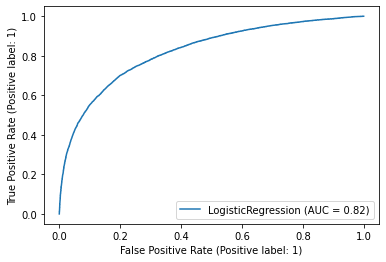

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve, roc_auc_score

# LinearRegression
plot_roc_curve(lr, X_test, y_test)
plt.show()

c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


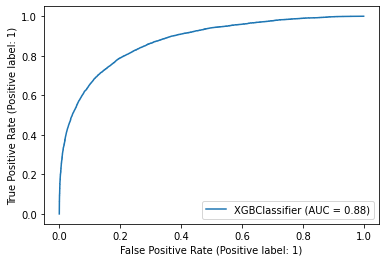

In [30]:
plot_roc_curve(xgb, X_test, y_test)
plt.show()

c:\Users\wagar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


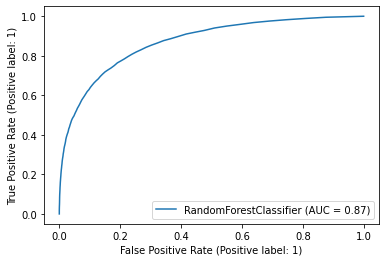

In [31]:
plot_roc_curve(rf, X_test, y_test)
plt.show()

AUC 값은 XGB가 0.88로 가장 높았으며, 그 다음이 RandomForest가 0.87로 높았음